In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchmetrics
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as f
import os

import matplotlib.pyplot as plt
import numpy as np

In [24]:
transform = transforms.Compose([transforms.ToTensor()])

train_batch_size = 50
test_batch_size = 20
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False, num_workers=2)

In [25]:
torch.manual_seed(1)
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = f.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

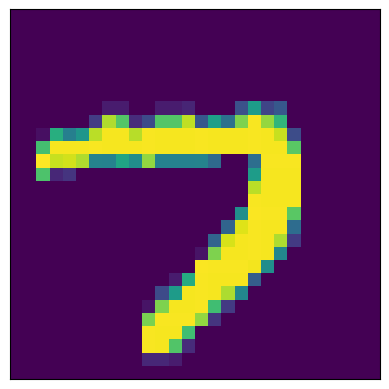

In [33]:
for i, (x, y) in enumerate(train_loader):
    break

x_train = x[0]
y_train = y[0]
show(x_train)

In [34]:
class LeNet(nn.Module):
    def __init__(self, input_channels: int, num_classe: int):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=5*5*16, out_features=120)
        self.fc2 =  nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=num_classe)
        self.log_soft = nn.LogSoftmax(dim=1)

    def forward(self, X):
        X = self.conv1(X)
        X = F.relu(X)

        X = F.avg_pool2d(X,kernel_size=2, stride=2)

        X = self.conv2(X)
        X = F.relu(X)

        X = F.avg_pool2d(X, kernel_size=2, stride=2)

        X = X.view(-1, 16*5*5) # flatten all conv features

        X = self.fc1(X)
        X = self.fc2(X)
        X = self.fc3(X)

        return self.log_soft(X)
